# LIGA HISTORICAL DATA

## Analysis of the historical figures for the Spain liga from 2020

First we have to define a function to get the database we wrote in our google sheet 

In [84]:
# Import lybraries
import gspread
import warnings
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

In [85]:
#Function to autheticate our google api with our json credentials
def authenticate_google_sheet(json_keyfile, scope):
    creds = ServiceAccountCredentials.from_json_keyfile_name(json_keyfile, scope)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=DeprecationWarning)
        client = gspread.authorize(creds)
    return client

In [86]:
# Specify the path to your credentials JSON file
json_keyfile = "C:/Users/aureb/OneDrive - Sport-Data/Documents/COURS/DATABIRD/PROJECT/imposing-bee-389610-823a1fac476d.json"
# Define the scope
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
# Authenticate using the credentials
client = authenticate_google_sheet(json_keyfile, scope)

In [87]:
# Finally we create a function to take the sheet we want with the name of the file
def get_historical_liga_db(sheet_name,client):
    spreadsheet = client.open(sheet_name)
    # Get the first (and presumably only) sheet in the spreadsheet
    worksheet = spreadsheet.get_worksheet(0)
    # Convert the sheet data to a Pandas DataFrame
    df = pd.DataFrame(worksheet.get_all_records())
    # Cleaning the DATE : string to date format
    df['Date'] = pd.to_datetime(df['Date']).dt.date
    return df

In [88]:
db = get_historical_liga_db("historical_data_teams",client)
db.sample(10)

,Date,game_id,Team,Goals,xG,Possession,Passing Accuracy,Shots on Target,Saves,Yellow_cards,...,Crosses,Touches,Tackles,Interceptions,Aerials_Won,Clearances,Offsides,Goal Kicks,Throw Ins,Long Balls
970,2021-03-06,5c84db99,Osasuna,0,0.8,37,79,30,66,0,...,21,544,12,8,11,13,0,7,19,68
1105,2023-10-08,68a32c10,Betis,1,0.9,60,82,33,100,3,...,15,696,10,8,5,12,1,16,18,66
1154,2023-04-02,6d421caf,Villarreal,2,2.7,52,81,20,100,5,...,10,537,17,4,9,23,4,10,18,68
1509,2020-12-13,8c7f5044,Villarreal,1,1.2,54,82,29,80,3,...,23,654,14,7,15,13,2,5,21,63
333,2023-04-09,22adf5a4,Valencia,1,1.3,60,76,27,50,2,...,43,575,13,2,12,10,0,5,38,61
409,2023-12-17,29830e6b,Mallorca,0,1.9,47,68,10,100,1,...,27,505,21,4,18,18,2,7,31,99
1025,2020-10-25,606d1bce,Alavés,2,2.5,55,77,23,100,0,...,21,589,12,12,26,18,3,7,23,81
1065,2022-10-14,64f3e100,Getafe,0,0.4,35,69,50,100,3,...,4,475,12,13,11,36,0,9,23,83
1772,2022-10-22,a9afb44e,Valencia,1,1.2,67,81,17,75,3,...,34,685,14,4,16,11,3,2,24,66
2153,2021-10-17,cdc92553,Osasuna,2,0.6,28,61,33,83,5,...,17,378,15,18,16,25,3,10,20,60


## Data analysis

### Possession and Passing Accuracy

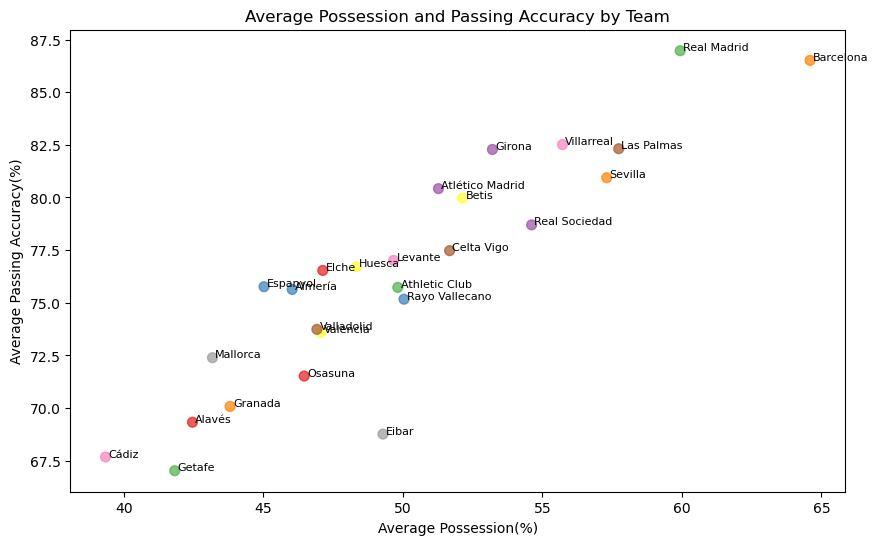

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns  

# Group by 'Team' and calculate the mean values
team_summary = db.groupby('Team')[['Possession', 'Passing Accuracy']].mean().reset_index()

# Create a scatter plot using matplotlib
plt.figure(figsize=(10, 6))

# Scatter plot
scatter = plt.scatter(
    team_summary['Possession'], 
    team_summary['Passing Accuracy'], 
    c=colors,  # Set a single color for all points
    s=50,  # Marker size
    alpha=0.7,  # Transparency
)

# Add text annotations
for i, team in enumerate(team_summary['Team']):
    plt.text(team_summary['Possession'][i] + 0.1, team_summary['Passing Accuracy'][i], team, fontsize=8)

# Set labels and title
plt.xlabel('Average Possession(%)')
plt.ylabel('Average Passing Accuracy(%)')
plt.title('Average Possession and Passing Accuracy by Team')

# Show the plot
plt.show()

The position of each point on the scatter plot indicates the team's balance between possession and passing accuracy.
Teams towards the upper right corner likely exhibit both high possession percentages and accurate passing, reflecting a possession-oriented and precise passing style.(Real Madrid, Barcelona)

The spread of points across the plot reveals the diversity in playing styles among different teams.

Teams clustering in the upper right might prioritize possession(55% or more) but may have room for improvement in passing accuracy.(Villareal, Las Palmas, Sevilla, Real Sociedad)
Overall, the points form a straight line, showing a strong linear relationship between possession and passing accuracy.

## Goals and Expected goals (xG)

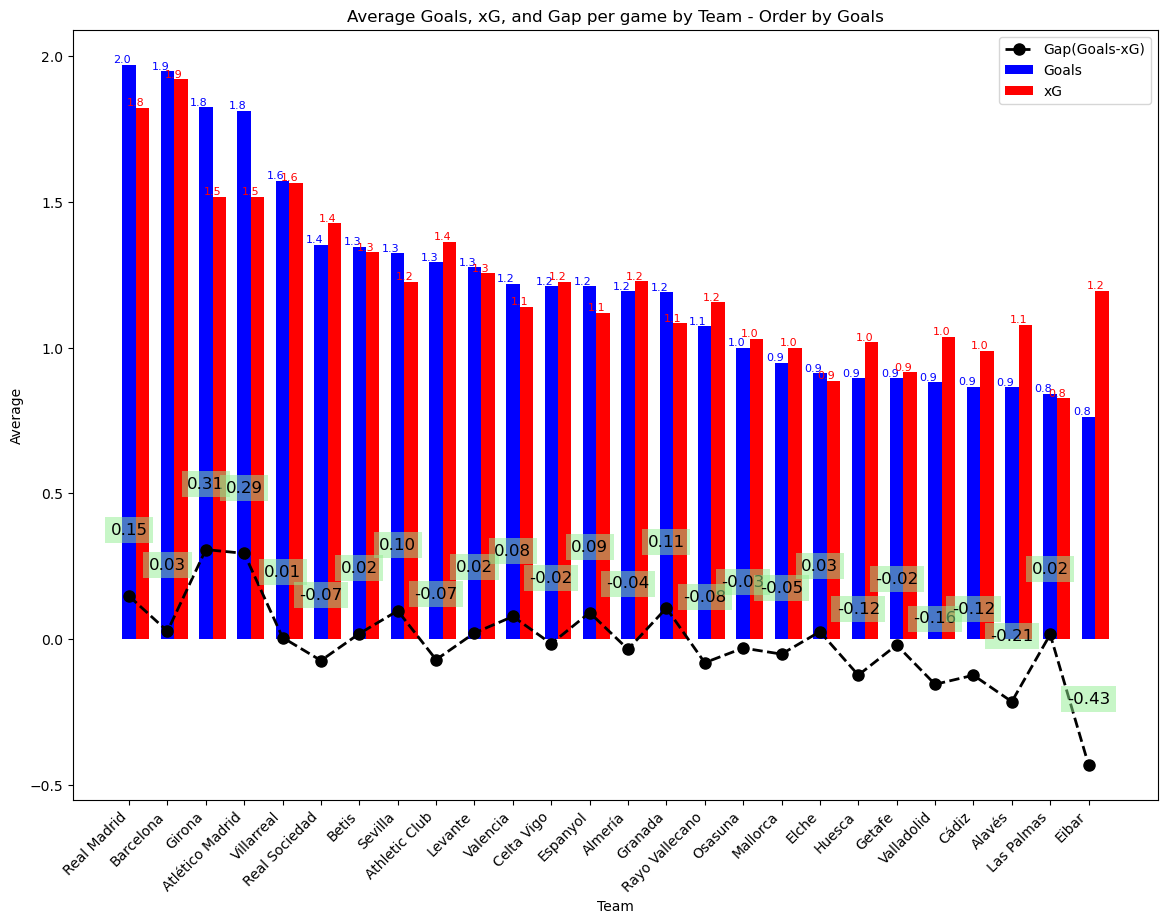

In [175]:
# Group by 'Team' and calculate the mean values
team_summary = db.groupby('Team')[['Goals', 'xG']].mean().reset_index()

# Calculate the gap between 'Goals' and 'xG'
team_summary['Gap'] = team_summary['Goals'] - team_summary['xG']

# Sort the DataFrame by 'Goals' in descending order
team_summary = team_summary.sort_values(by='Goals', ascending=False)

# Create a vertical grouped bar plot using matplotlib
plt.figure(figsize=(14, 10))

# Use a Seaborn color palette to assign different colors to each team
colors = {'Goals': 'blue', 'xG': 'red', 'Gap': 'black'}

# Plot the grouped bars for 'Goals' and 'xG'
bar_width = 0.35
bar_positions = range(len(team_summary['Team']))

# Plot the bars for 'Goals'
plt.bar(
    bar_positions,
    team_summary['Goals'],
    color=colors['Goals'],
    label='Goals',
    width=bar_width,
    align='center'
)

# Plot the bars for 'xG'
plt.bar(
    [pos + bar_width for pos in bar_positions],
    team_summary['xG'],
    color=colors['xG'],
    label='xG',
    width=bar_width,
    align='center'
)

# Add values above the bars
for i, (goal, xg) in enumerate(zip(team_summary['Goals'], team_summary['xG'])):
    plt.text(i - bar_width/2, goal , f'{goal:.1f}', fontsize=8, ha='center', va='bottom', color=colors['Goals'])
    plt.text(i + bar_width/2, xg , f'{xg:.1f}', fontsize=8, ha='center', va='bottom', color=colors['xG'])

# Plot the line for the gap
line = plt.plot(
    bar_positions,
    team_summary['Gap'],
    color=colors['Gap'],
    marker='o',  # Add markers for each point
    linestyle='--',  # Dashed line
    linewidth=2,  # Line width
    markersize=8,  # Marker size
    label='Gap(Goals-xG)'  # Add a label for the line in the legend
)

# Add values above the line
for i, gap in enumerate(team_summary['Gap']):
    plt.text(i, gap + 0.2, f'{gap:.2f}', fontsize=12, ha='center', va='bottom', color=colors['Gap'],
             bbox=dict(facecolor='lightgreen', alpha=0.5, edgecolor='none'))

    
# Set labels and title
plt.xlabel('Team')
plt.ylabel('Average')
plt.title('Average Goals, xG, and Gap per game by Team - Order by Goals')

# Show legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(bar_positions, team_summary['Team'], rotation=45, ha='right')

# Show the plot
plt.show()

Average Goals:
The blue bars represent the average goals scored per game by each team.
Teams with higher blue bars have a higher actual goal-scoring record, indicating their effectiveness in converting opportunities into goals.

Expected Goals (xG):
The red bars represent the average expected goals (xG) per game.
Teams with higher orange bars have a higher expected goal-scoring potential, based on statistical models that evaluate the quality of scoring opportunities.

Gap (Green Line): 
Depicts the gap between average goals and expected goals. A positive gap indicates that a team is overperforming compared to the expected goals, suggesting effective finishing. Conversely, a negative gap suggests underperformance, indicating that a team may not be converting scoring opportunities as efficiently.

Teams like Real Madrid, Barcelona with both high average goals and xG demonstrate efficiency in scoring, indicating a well-balanced attacking strategy.
While teams like Eibar, Alaves, Valladolid with with goal averages smaller than the xG may indicate potential areas for improvement in finishing.
Generaly, Teams with a significant difference between average goals and xG may have key players who excel in finishing(Girona, Atletico Madrid) or goalkeepers who make crucial saves.

## Indiscipline

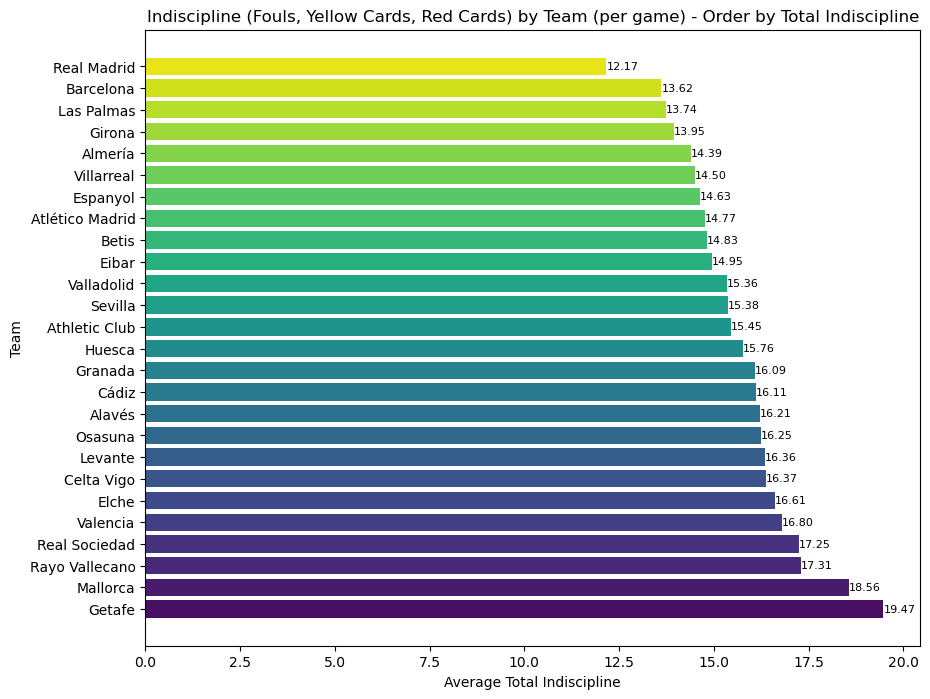

In [129]:
# Calculate the total indiscipline score for each team
db['Total_Indiscipline'] = db['Fouls'] + db['Yellow_cards'] + db['Red_cards']

# Group by 'Team' and calculate the mean values
indiscipline_summary = db.groupby('Team')[['Fouls', 'Yellow_cards', 'Red_cards', 'Total_Indiscipline']].mean().reset_index()

# Sort the teams based on the total indiscipline score in descending order
indiscipline_summary_sorted = indiscipline_summary.sort_values(by='Total_Indiscipline', ascending=False)

# Create a horizontal bar plot with text annotations using matplotlib
plt.figure(figsize=(10, 8))

# Use a Seaborn color palette to assign different colors to each bar
colors = sns.color_palette("viridis", len(indiscipline_summary_sorted))

# Plot horizontal bars
bars = plt.barh(
    indiscipline_summary_sorted['Team'],
    indiscipline_summary_sorted['Total_Indiscipline'],
    color=colors
)

# Add text annotations for the total indiscipline score
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=8, color='black')

# Set labels and title
plt.xlabel('Average Total Indiscipline')
plt.ylabel('Team')
plt.title('Indiscipline (Fouls, Yellow Cards, Red Cards) by Team (per game) - Order by Total Indiscipline')

# Show the plot
plt.show()

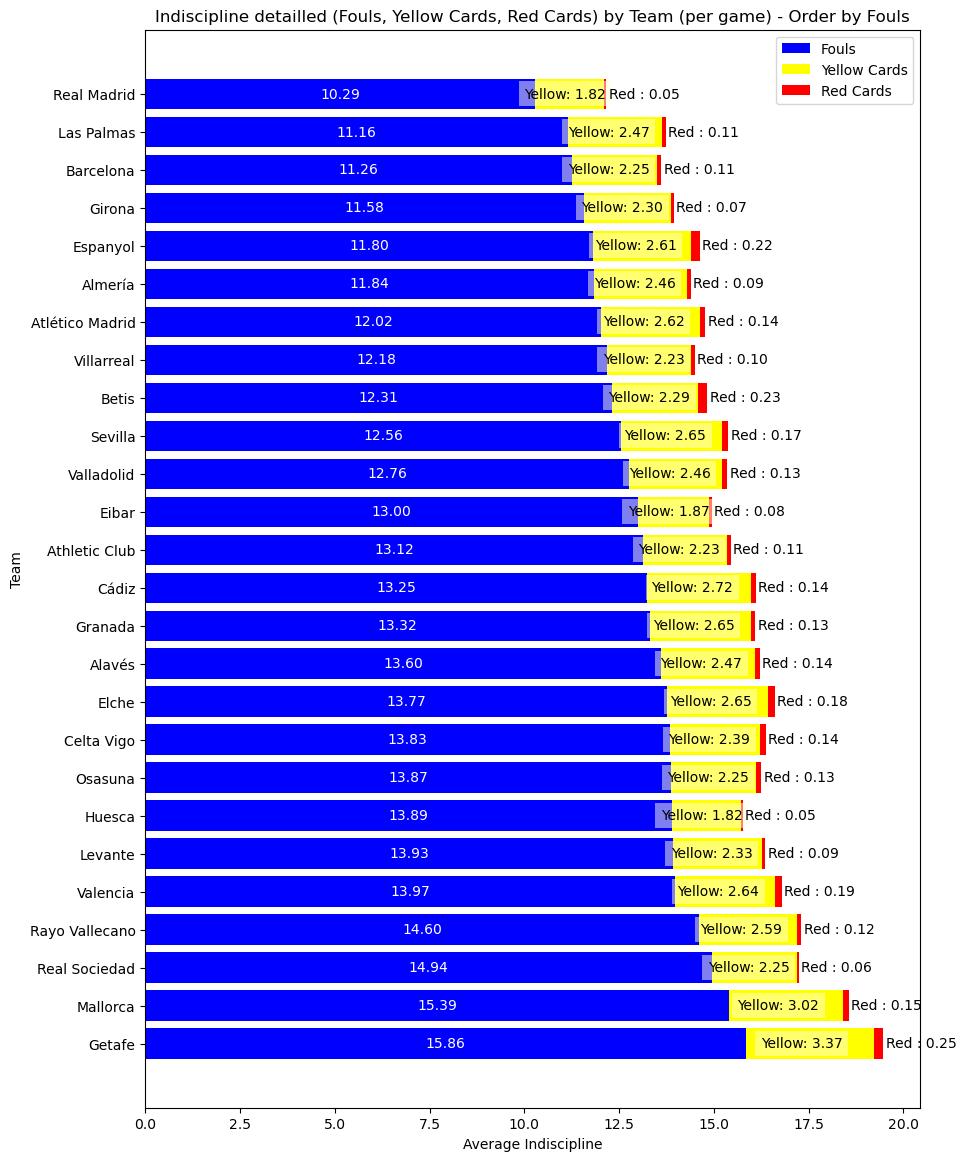

In [202]:
# Calculate the total indiscipline score for each team
db['Total_Indiscipline'] = db['Fouls'] + db['Yellow_cards'] + db['Red_cards']

# Group by 'Team' and calculate the mean values
indiscipline_summary = db.groupby('Team')[['Fouls', 'Yellow_cards', 'Red_cards', 'Total_Indiscipline']].mean().reset_index()

# Sort the teams based on the total indiscipline score in descending order
indiscipline_summary_sorted = indiscipline_summary.sort_values(by='Fouls', ascending=False)

# Create a horizontal bar plot with different colors for yellow and red cards using matplotlib
plt.figure(figsize=(10, 14))

# Use a Seaborn color palette to assign different colors to each bar
colors = {'Fouls': 'blue', 'Yellow_cards': 'yellow', 'Red_cards': 'red'}

# Plot horizontal bars for Fouls
bars_fouls = plt.barh(
    indiscipline_summary_sorted['Team'],
    indiscipline_summary_sorted['Fouls'],
    color=colors['Fouls'],
    label='Fouls'
)

# Plot horizontal bars for Yellow Cards
bars_yellow_cards = plt.barh(
    indiscipline_summary_sorted['Team'],
    indiscipline_summary_sorted['Yellow_cards'],
    left=indiscipline_summary_sorted['Fouls'],
    color=colors['Yellow_cards'],
    label='Yellow Cards'
)

# Plot horizontal bars for Red Cards
bars_red_cards = plt.barh(
    indiscipline_summary_sorted['Team'],
    indiscipline_summary_sorted['Red_cards'],
    left=indiscipline_summary_sorted['Fouls'] + indiscipline_summary_sorted['Yellow_cards'],
    color=colors['Red_cards'],
    label='Red Cards'
)

# Add fouls values as text annotations inside the bar in white color
for team, fouls in zip(
    indiscipline_summary_sorted['Team'],
    indiscipline_summary_sorted['Fouls']
):
    plt.text(fouls/2, team, f'{fouls:.2f}', va='center', ha='center', fontsize=10, color='white')

# Add yellow card values as text annotations inside the yellow card bar in black color
for team, fouls, yellow_cards in zip(
    indiscipline_summary_sorted['Team'],
    indiscipline_summary_sorted['Fouls'],
    indiscipline_summary_sorted['Yellow_cards']
):
    plt.text(fouls + yellow_cards/2.3, team, f'Yellow: {yellow_cards:.2f}', va='center', ha='center', fontsize=10, color='black',
               bbox=dict(facecolor='lightyellow', alpha=0.5, edgecolor='none'))

# Add yellow card values as text annotations inside the yellow card bar in black color
for team, fouls, yellow_cards, red_cards in zip(
    indiscipline_summary_sorted['Team'],
    indiscipline_summary_sorted['Fouls'],
    indiscipline_summary_sorted['Yellow_cards'],
    indiscipline_summary_sorted['Red_cards']
):
    plt.text(fouls + yellow_cards+ red_cards +1, team, f'Red : {red_cards:.2f}', va='center', ha='center', fontsize=10, color='black')

    
# Set labels and title
plt.xlabel('Average Indiscipline')
plt.ylabel('Team')
plt.title('Indiscipline detailled (Fouls, Yellow Cards, Red Cards) by Team (per game) - Order by Fouls')

# Show the legend
plt.legend()

# Show the plot
plt.show()

Fouls:
The chart reveals significant variations in the average number of fouls committed by teams per game.
Teams with a higher number of fouls may adopt a more physical playing style, potentially indicating a robust defensive approach.

Yellow Cards:
Represented by the yellow bars and offer insights into the teams' disciplinary records.
Teams with a higher frequency of yellow cards may face challenges in maintaining player discipline, risking potential suspensions.

Red Cards:
Highlighted in red, indicating a team's instances of severe indiscipline leading to player ejections.
Teams with a higher average of red cards per game may need to address issues related to player conduct on the field.

These horizontal bar charts provide a comprehensive view of the indiscipline levels among the teams, considering fouls, yellow cards, and red cards on average per game.
The "Total Indiscipline" score combines fouls, yellow cards, and red cards to provide a holistic view of a team's overall discipline.

Sorting teams by fouls helps identify those with the highest average indiscipline levels.

We can see that succesful teams like Real Madrid and Barcelona have a strategic focus on discipline, contributing to a more stable and consistent performance over the season.



## Defensive stats

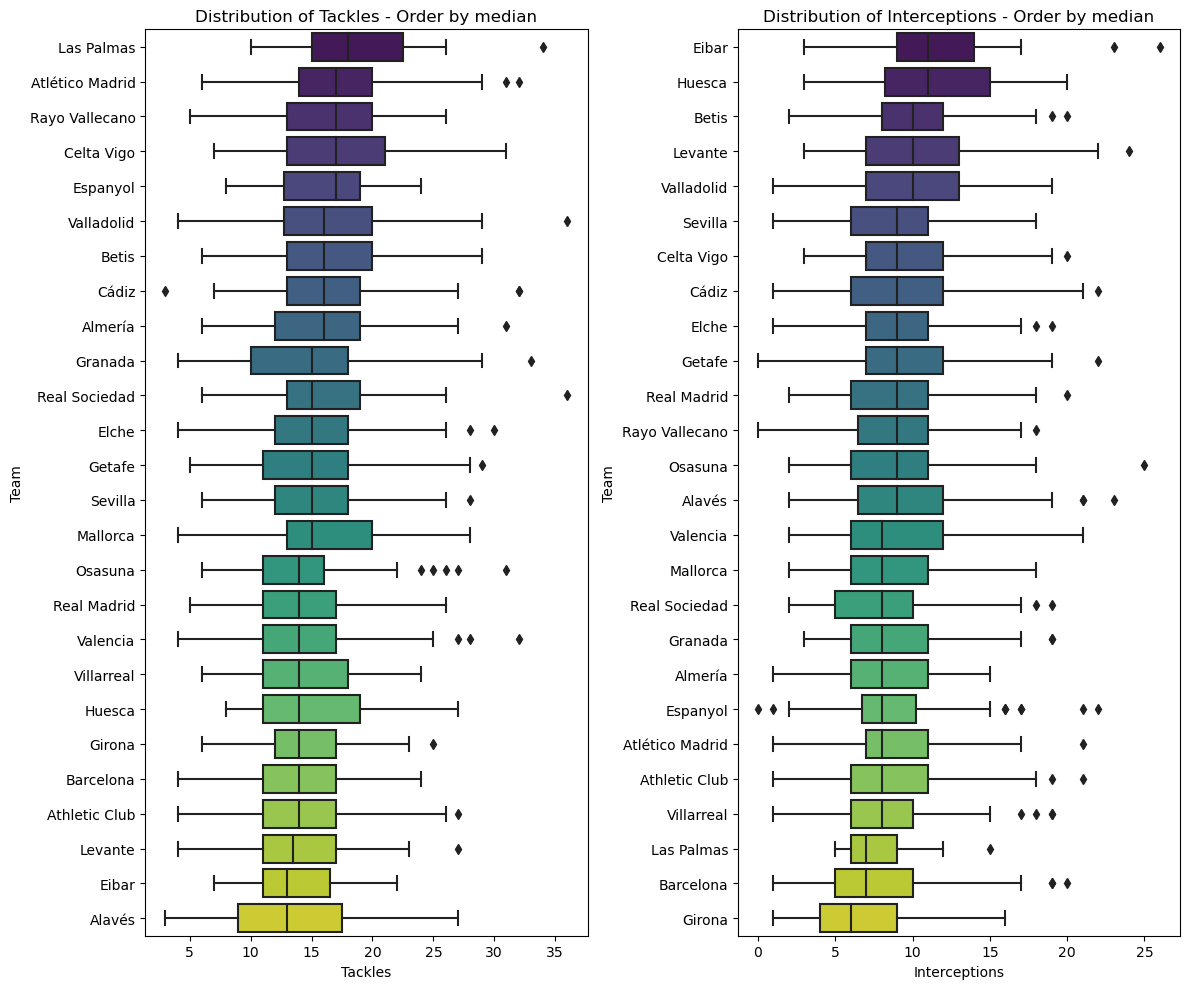

In [203]:
# Define the stats columns
stats_columns = ['Tackles', 'Interceptions']

# Calculate the median for each stat
median_stats = db.groupby('Team')[stats_columns].median().reset_index()

# Sort the teams based on the median of Tackles in descending order
median_tackles_sorted = median_stats.sort_values(by='Tackles', ascending=False)

# Sort the teams based on the median of Interceptions in descending order
median_interceptions_sorted = median_stats.sort_values(by='Interceptions', ascending=False)

# Create individual box plots for each stat using matplotlib
plt.figure(figsize=(12,10))

# Box plot for Tackles
plt.subplot(1, 2, 1)
sns.boxplot(x='Tackles', y='Team', data=db, order=median_tackles_sorted['Team'], palette='viridis')
plt.title('Distribution of Tackles - Order by median')

# Box plot for Interceptions
plt.subplot(1, 2, 2)
sns.boxplot(x='Interceptions', y='Team', data=db, order=median_interceptions_sorted['Team'], palette='viridis')
plt.title('Distribution of Interceptions - Order by median')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

With these two analysis we can see that not necessary the "best" teams of the Liga have the biggest defensive impact. 
I think that Barcelona is the best example, they're in the last few because they might have a more possession-based and offensive-oriented style, relying on skillful players to control the game and score goals.

We can see Atletico Madrid with a high tackles count because it's a very powerful Counter-Attacking Team, they excel at counter-attacking football, where they absorb pressure and quickly transition into attacks. 

## Analysis of Crosses, Tackles, Interceptions, Aerials_won

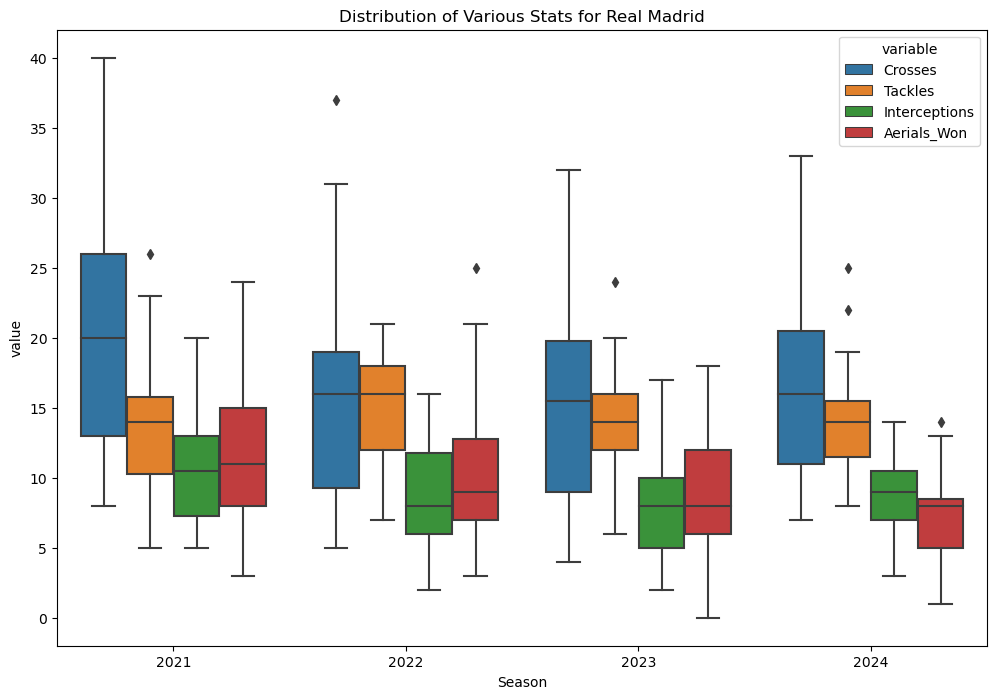

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to only have Real Madrid figures
real_madrid_df = db[db['Team'] == 'Real Madrid']

# List of stats columns
stats_columns = ['Crosses', 'Tackles', 'Interceptions', 'Aerials_Won']

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Season', y='value', hue='variable', data=pd.melt(real_madrid_df[['Season'] + stats_columns], id_vars='Season'))
plt.title('Distribution of Various Stats for Real Madrid')
plt.show()

Through this distribution we can see that the Real Madrid has been quite regular(with the regarding stats) from the season 2020-2021 until now.
Note that the 2021 season was the one in which the team produced the most crosses, and the most aerial duels won too.
We can't draw any hasty conclusions with the current season (2024) because the sample is smaller. 

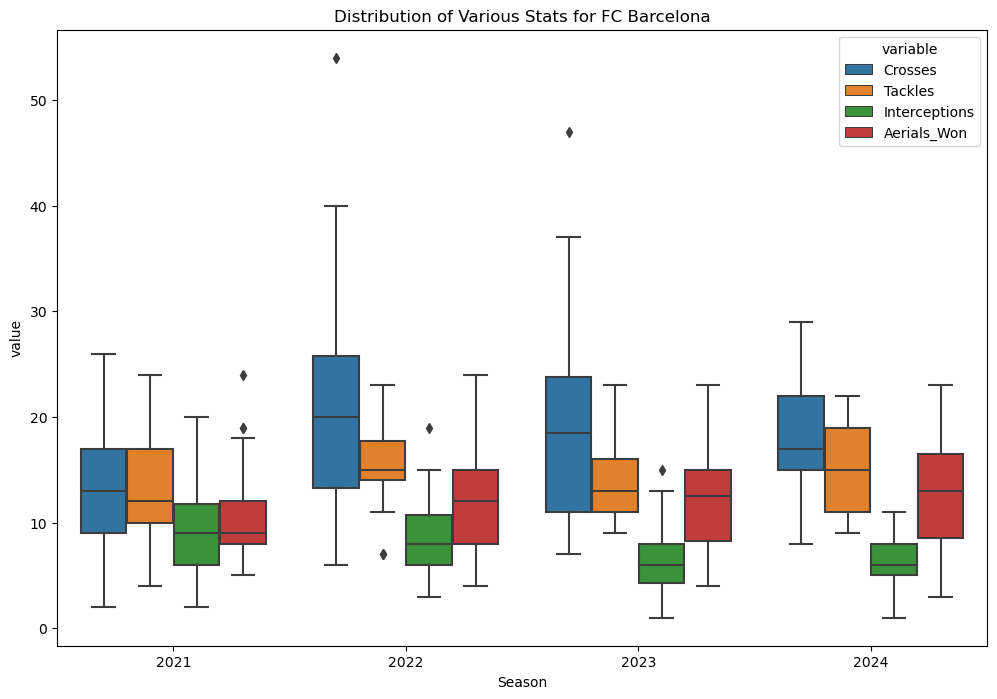

In [95]:
# Filter the DataFrame to only have Real Madrid figures
Barcelona_df = db[db['Team'] == 'Barcelona']

# List of stats columns
stats_columns = ['Crosses', 'Tackles', 'Interceptions', 'Aerials_Won']

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Season', y='value', hue='variable', data=pd.melt(Barcelona_df[['Season'] + stats_columns], id_vars='Season'))
plt.title('Distribution of Various Stats for FC Barcelona')
plt.show()

Through this distribution we can see that Barcelona has been quite regular(with the regarding stats) from the season 2020-2021 until now.
Unlike real madrid, the number of crosses and aerial duels won in 2021 is low compared with other seasons. 
We can't draw any hasty conclusions with the current season (2024) because the sample is smaller. 

## Shots on Target efficiency

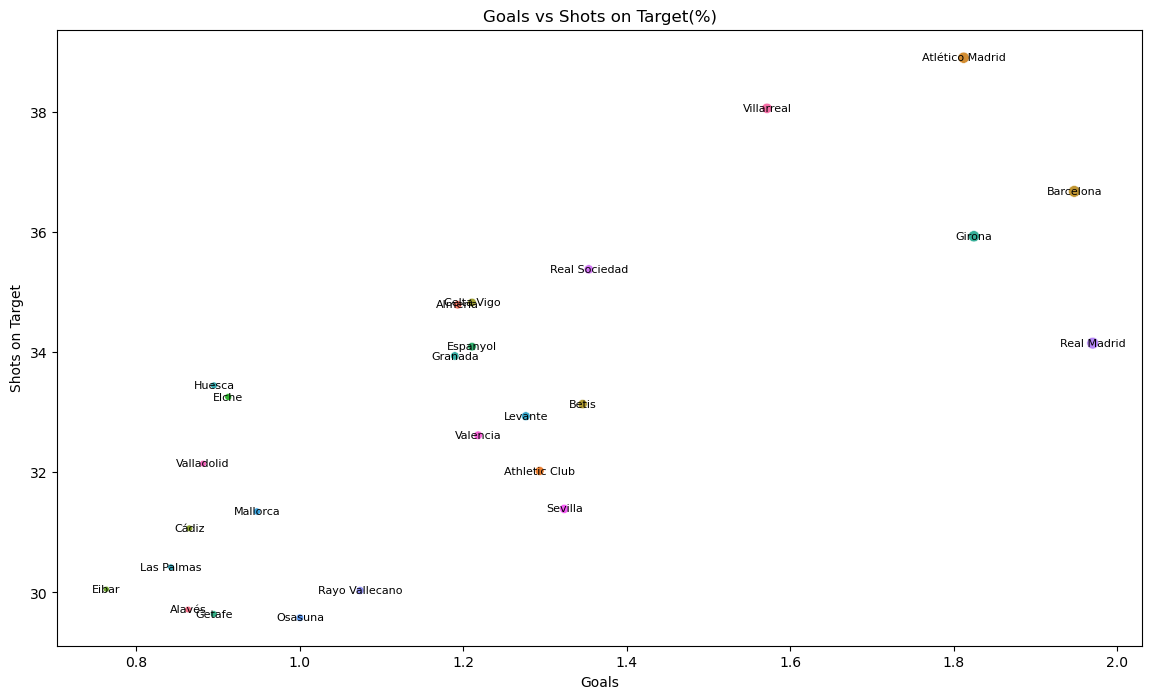

<Figure size 2000x2500 with 0 Axes>

In [207]:
plt.figure(figsize=(14, 8))
# Remove rows with missing values in the specified columns
df_cleaned = db.dropna(subset=['Goals', 'Shots on Target'])
# Convert the relevant columns to numeric values
df_cleaned['Goals'] = pd.to_numeric(df_cleaned['Goals'])
df_cleaned['Shots on Target'] = pd.to_numeric(df_cleaned['Shots on Target'])

#Group by to have the average of the stats we want to analysis
stats_columns = ["Goals","Shots on Target"]
df_cleaned = df_cleaned.groupby('Team')[stats_columns].mean().reset_index()

sns.scatterplot(x='Goals', y='Shots on Target', size='Goals', hue='Team', data=df_cleaned, legend = False)
plt.title('Goals vs Shots on Target(%)')
# Annotate each point with the team name
for i, team in enumerate(df_cleaned['Team']):
    plt.text(df_cleaned['Goals'].iloc[i], df_cleaned['Shots on Target'].iloc[i], team, fontsize=8, ha='center', va='center')
# Set the size of the figure
plt.figure(figsize=(20, 25))

plt.show()

This analysis provides us the effectiveness of teams in converting their shots on target into goals.

We can see the clinical finishers of the liga since 2020. Real Madrid is very impressive, they are almost 2 goals per game with "only" 34% of their shots on Target.
Barcelona & Atletico Madrid scored fewer goals with a higher percentage of shots on target
In the bottom left we are not very suprised of the names we find, we can see that Huesca and Elche have almost the same percentage of Shots on target, but with an average of goals per game considerably lower ! 